# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muchammad Fadika Naddiyanto
- **Email:** muchammadfadika81@gmail.com
- **ID Dicoding:** muchammad_fadika_naddiyanto_m296b4ky2597_zuKg

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca dan musiman terhadap jumlah penyewaan sepeda?
- Apakah ada pola penyewaan sepeda berdasarkan hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [25]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

Menilai Table Day

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Duplikasi: ", day_df.duplicated().sum())

Duplikasi:  0


In [27]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel Hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Duplikasi: ", hour_df.duplicated().sum())

Duplikasi:  0


In [36]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

Memeriksa missing values

In [14]:
missing_values = day_df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
missing_values = hour_df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Memeriksa duplikasi

In [16]:
duplicate_rows = day_df.duplicated().sum()
print("Jumlah duplikasi:", duplicate_rows)

if duplicate_rows > 0:
    data = data.drop_duplicates()

Jumlah duplikasi: 0


In [17]:
duplicate_rows = hour_df.duplicated().sum()
print("Jumlah duplikasi:", duplicate_rows)

if duplicate_rows > 0:
    data = data.drop_duplicates()

Jumlah duplikasi: 0


Memeriksa Outliers

In [31]:
temp_outliers = day_df[(day_df['temp'] < 0) | (day_df['temp'] > 1)]
print("Outliers pada kolom 'temp':\n", temp_outliers)

Outliers pada kolom 'temp':
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [34]:
temp_outliers = hour_df[(hour_df['temp'] < 0) | (hour_df['temp'] > 1)]
print("Outliers pada kolom 'temp':\n", temp_outliers)

Outliers pada kolom 'temp':
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Setelah mengecek segala kesuaian data dengan proses cleaning data maka data disimpan.

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### 1. Explore day_df

In [66]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Distribusi Variabel

In [68]:
# Menghitung distribusi variabel numerik
for column in day_df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Distribusi untuk kolom {column}:")
    print(day_df[column].value_counts())
    print("\n")

Distribusi untuk kolom instant:
instant
1      1
481    1
483    1
484    1
485    1
      ..
246    1
247    1
248    1
249    1
731    1
Name: count, Length: 731, dtype: int64


Distribusi untuk kolom season:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


Distribusi untuk kolom yr:
yr
1    366
0    365
Name: count, dtype: int64


Distribusi untuk kolom mnth:
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64


Distribusi untuk kolom holiday:
holiday
0    710
1     21
Name: count, dtype: int64


Distribusi untuk kolom weekday:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64


Distribusi untuk kolom workingday:
workingday
1    500
0    231
Name: count, dtype: int64


Distribusi untuk kolom weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


Distribusi untuk kolom temp:
temp
0.635000    5
0.265833    5


Analisis Berdasarkan Kategori

In [71]:
# Melihat distribusi variabel kategori
for column in ['season', 'weathersit', 'holiday', 'weekday', 'workingday']:
    print(f"Distribusi untuk kolom {column}:")
    print(day_df[column].value_counts())
    print("\n")

Distribusi untuk kolom season:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


Distribusi untuk kolom weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


Distribusi untuk kolom holiday:
holiday
0    710
1     21
Name: count, dtype: int64


Distribusi untuk kolom weekday:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64


Distribusi untuk kolom workingday:
workingday
1    500
0    231
Name: count, dtype: int64




Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda

In [73]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
cuaca_mean = day_df.groupby('weathersit')['cnt'].mean()
print("Rata-rata penyewaan sepeda per kondisi cuaca:")
print(cuaca_mean)

# Menghitung rata-rata penyewaan sepeda berdasarkan musim
musim_mean = day_df.groupby('season')['cnt'].mean()
print("Rata-rata penyewaan sepeda per musim:")
print(musim_mean)

Rata-rata penyewaan sepeda per kondisi cuaca:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64
Rata-rata penyewaan sepeda per musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


Pola Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur

In [75]:
# Rata-rata penyewaan sepeda pada hari kerja dan hari libur
workingday_mean = day_df.groupby('workingday')['cnt'].mean()
print("Rata-rata penyewaan sepeda pada hari kerja vs non-kerja:")
print(workingday_mean)

holiday_mean = day_df.groupby('holiday')['cnt'].mean()
print("Rata-rata penyewaan sepeda pada hari libur vs non-libur:")
print(holiday_mean)

Rata-rata penyewaan sepeda pada hari kerja vs non-kerja:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64
Rata-rata penyewaan sepeda pada hari libur vs non-libur:
holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64


Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

In [77]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata penyewaan sepeda
weekday_mean = day_df.groupby('weekday')['cnt'].mean()
print("Rata-rata penyewaan sepeda per hari dalam seminggu:")
print(weekday_mean)

Rata-rata penyewaan sepeda per hari dalam seminggu:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


### 2. Explore hour_df

In [78]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Distribusi Variabel

In [79]:
# Menghitung distribusi variabel numerik
for column in hour_df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Distribusi untuk kolom {column}:")
    print(hour_df[column].value_counts())
    print("\n")

Distribusi untuk kolom instant:
instant
1        1
11592    1
11578    1
11579    1
11580    1
        ..
5799     1
5800     1
5801     1
5802     1
17379    1
Name: count, Length: 17379, dtype: int64


Distribusi untuk kolom season:
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64


Distribusi untuk kolom yr:
yr
1    8734
0    8645
Name: count, dtype: int64


Distribusi untuk kolom mnth:
mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64


Distribusi untuk kolom hr:
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


Distribusi untuk kolom holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


Distribusi untuk kolom weekday

Analisis Berdasarkan Kategori

In [110]:
for column in ['season', 'weathersit', 'holiday', 'weekday', 'workingday']:
    print(f"Distribusi untuk kolom {column}:")
    print(hour_df[column].value_counts())
    print("\n")

Distribusi untuk kolom season:
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64


Distribusi untuk kolom weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


Distribusi untuk kolom holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


Distribusi untuk kolom weekday:
weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64


Distribusi untuk kolom workingday:
workingday
1    11865
0     5514
Name: count, dtype: int64




Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda

Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca

In [112]:
cuaca_mean = hour_df.groupby('weathersit')['cnt'].mean()
print("Rata-rata penyewaan sepeda per kondisi cuaca:")
print(cuaca_mean)

Rata-rata penyewaan sepeda per kondisi cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


Menghitung rata-rata penyewaan sepeda berdasarkan musim

In [113]:
musim_mean = hour_df.groupby('season')['cnt'].mean()
print("Rata-rata penyewaan sepeda per musim:")
print(musim_mean)

Rata-rata penyewaan sepeda per musim:
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


Pola Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur

Rata-rata penyewaan sepeda pada hari kerja dan hari libur

In [115]:
workingday_mean = hour_df.groupby('workingday')['cnt'].mean()
print("Rata-rata penyewaan sepeda pada hari kerja vs non-kerja:")
print(workingday_mean)

holiday_mean = hour_df.groupby('holiday')['cnt'].mean()
print("Rata-rata penyewaan sepeda pada hari libur vs non-libur:")
print(holiday_mean)

Rata-rata penyewaan sepeda pada hari kerja vs non-kerja:
workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64
Rata-rata penyewaan sepeda pada hari libur vs non-libur:
holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64


Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata penyewaan sepeda

In [83]:
weekday_mean = hour_df.groupby('weekday')['cnt'].mean()
print("Rata-rata penyewaan sepeda per jam dalam seminggu:")
print(weekday_mean)

Rata-rata penyewaan sepeda per jam dalam seminggu:
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Faktor Cuaca dan Musiman terhadap Jumlah Penyewaan Sepeda

Box plot untuk pengaruh cuaca

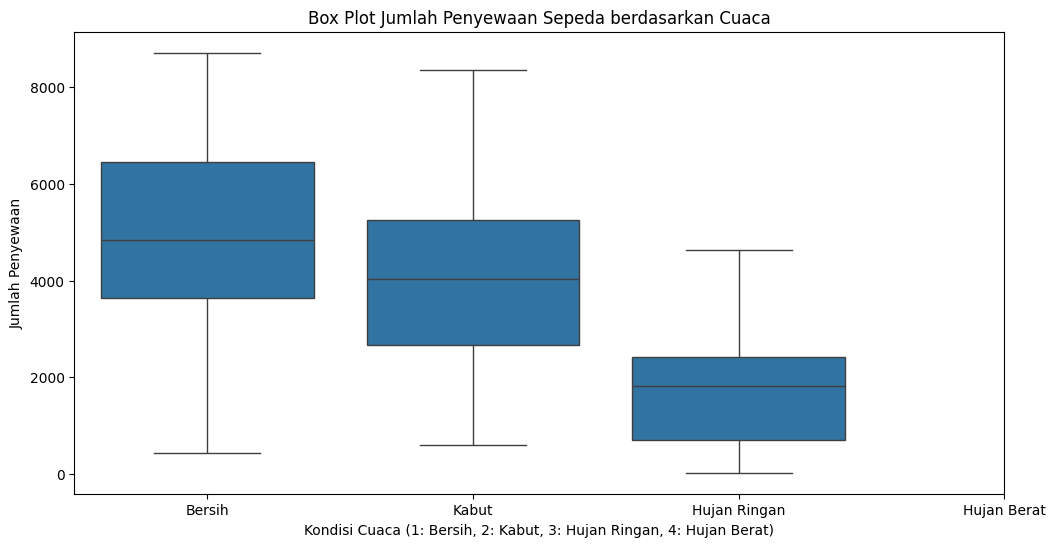

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Box Plot Jumlah Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca (1: Bersih, 2: Kabut, 3: Hujan Ringan, 4: Hujan Berat)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Bersih', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

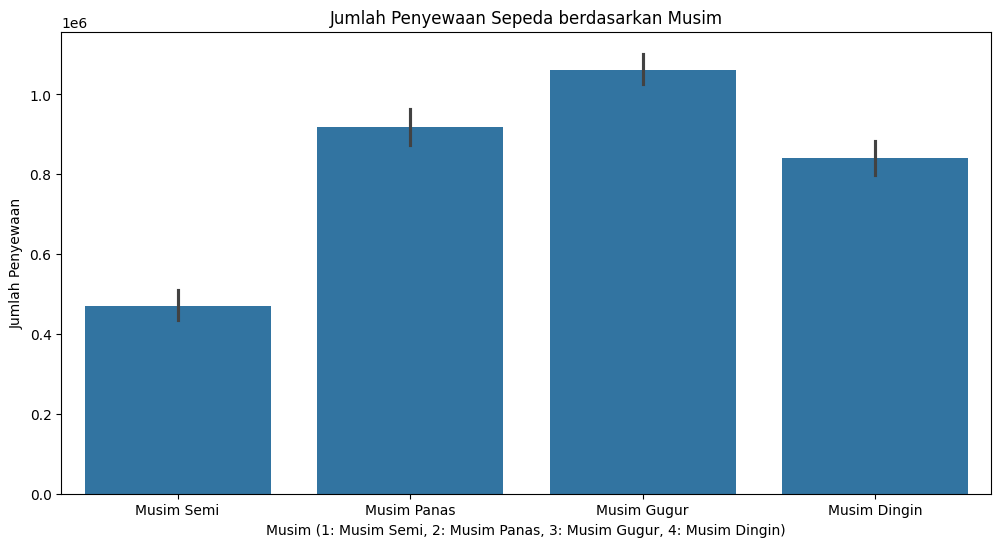

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_df, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

### Pertanyaan 2: Pola Penyewaan Sepeda berdasarkan Hari Kerja dan Hari Libur

Bar plot untuk pola penyewaan berdasarkan hari kerja dan hari libur

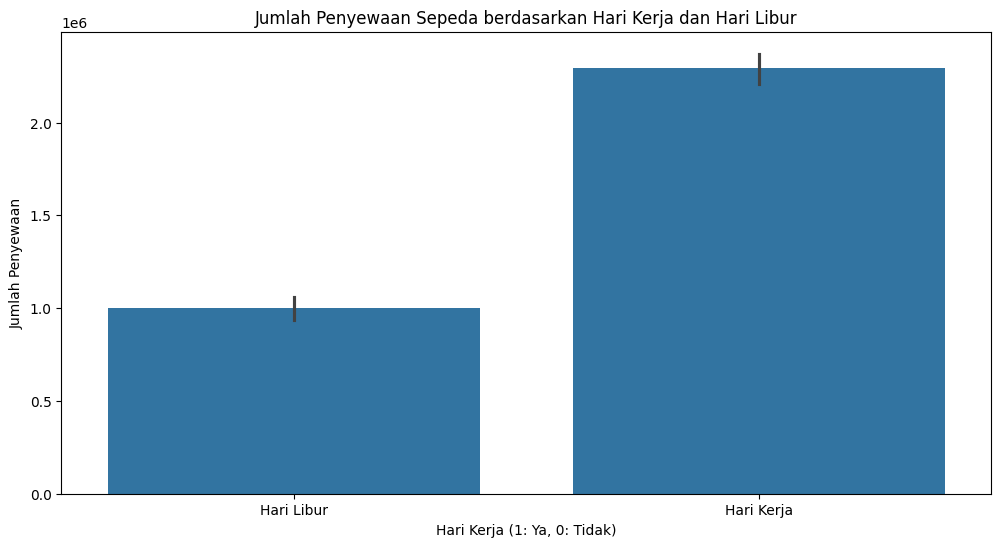

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

Line plot untuk penyewaan per jam berdasarkan jenis hari

<Figure size 1200x600 with 0 Axes>

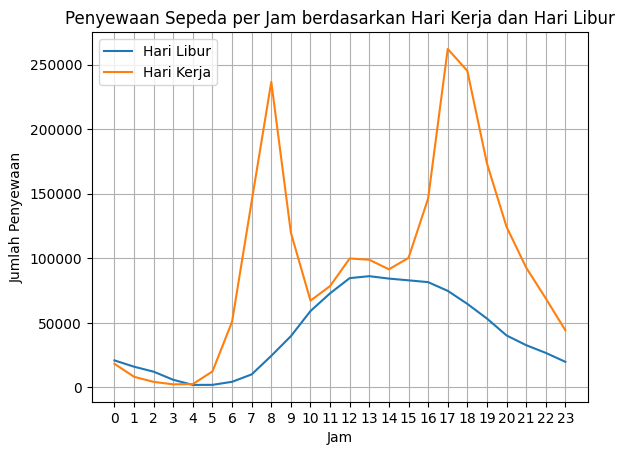

In [97]:
plt.figure(figsize=(12, 6))
hour_df.groupby(['hr', 'workingday'])['cnt'].sum().unstack().plot(kind='line')
plt.title('Penyewaan Sepeda per Jam berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(['Hari Libur', 'Hari Kerja'])
plt.xticks(range(0, 24, 1))
plt.grid()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [98]:
data = hour_df

In [99]:
# Convert 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Set the reference date for recency calculation
reference_date = data['dteday'].max() + pd.DateOffset(days=1)  # max date + 1 day

In [100]:
# Hitung RFM Metrics
rfm_df = data.groupby('casual').agg({
    'dteday': lambda x: (reference_date - x.max()).days,  # Recency
    'cnt': 'sum',  # Frequency
}).reset_index()

# Rename columns
rfm_df.columns = ['user_id', 'recency', 'frequency']

# Jika 'cnt' dianggap sebagai monetary, kita bisa menambahkan kolom monetary
# Misalnya, jika setiap penyewaan dihargai $1
rfm_df['monetary'] = rfm_df['frequency'] * 1  # Misalkan setiap penyewaan $1

In [101]:
# Mengkategorikan Recency
rfm_df['recency_segment'] = pd.qcut(rfm_df['recency'], 4, labels=['4', '3', '2', '1'])  # 1: baru, 4: lama

# Mengkategorikan Frequency
rfm_df['frequency_segment'] = pd.qcut(rfm_df['frequency'], 4, labels=['1', '2', '3', '4'])  # 4: sering, 1: jarang

# Mengkategorikan Monetary
rfm_df['monetary_segment'] = pd.qcut(rfm_df['monetary'], 4, labels=['1', '2', '3', '4'])  # 4: banyak, 1: sedikit

# Kombinasi RFM Score
rfm_df['RFM_Score'] = rfm_df['recency_segment'].astype(str) + rfm_df['frequency_segment'].astype(str) + rfm_df['monetary_segment'].astype(str)


In [102]:
# Melihat hasil RFM analysis
print(rfm_df.head())

   user_id  recency  frequency  monetary recency_segment frequency_segment  \
0        0        1      20920     20920               4                 4   
1        1        2      27181     27181               4                 4   
2        2        1      29764     29764               4                 4   
3        3        1      38656     38656               4                 4   
4        4        1      37314     37314               4                 4   

  monetary_segment RFM_Score  
0                4       444  
1                4       444  
2                4       444  
3                4       444  
4                4       444  


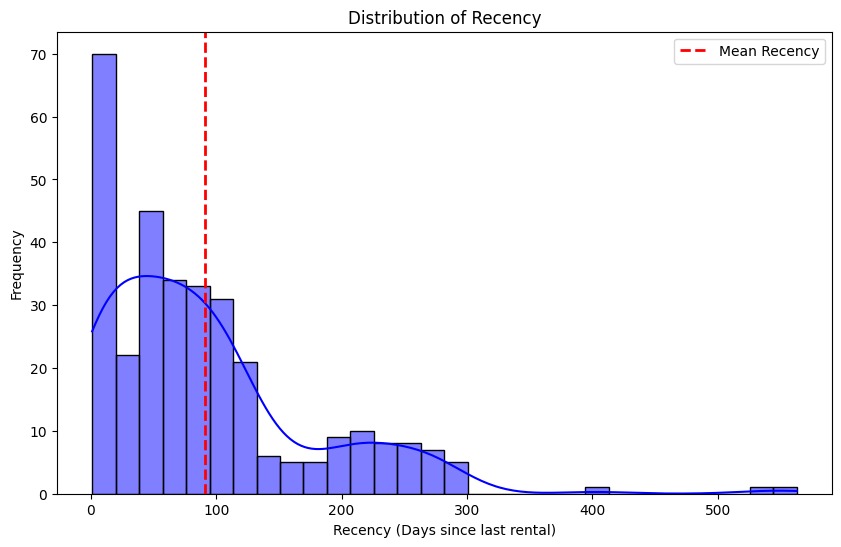

In [103]:
# 2. Visualisasi Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['recency'], bins=30, kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days since last rental)')
plt.ylabel('Frequency')
plt.axvline(rfm_df['recency'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Recency')
plt.legend()
plt.show()

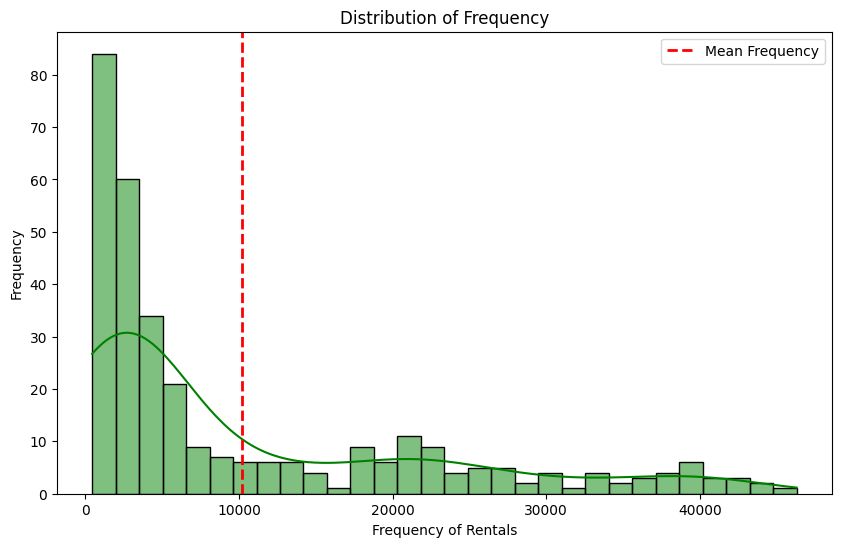

In [104]:
# 3. Visualisasi Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['frequency'], bins=30, kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency of Rentals')
plt.ylabel('Frequency')
plt.axvline(rfm_df['frequency'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Frequency')
plt.legend()
plt.show()

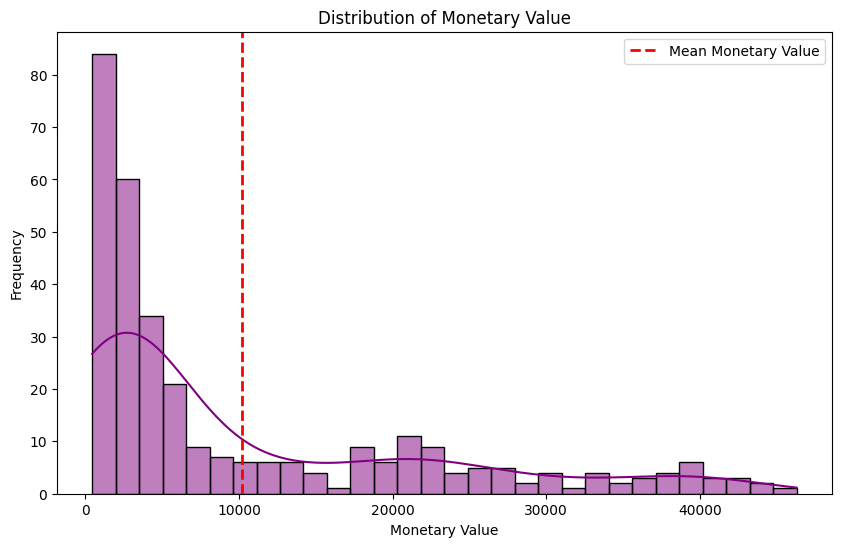

In [105]:
# 4. Visualisasi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], bins=30, kde=True, color='purple')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.axvline(rfm_df['monetary'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Monetary Value')
plt.legend()
plt.show()

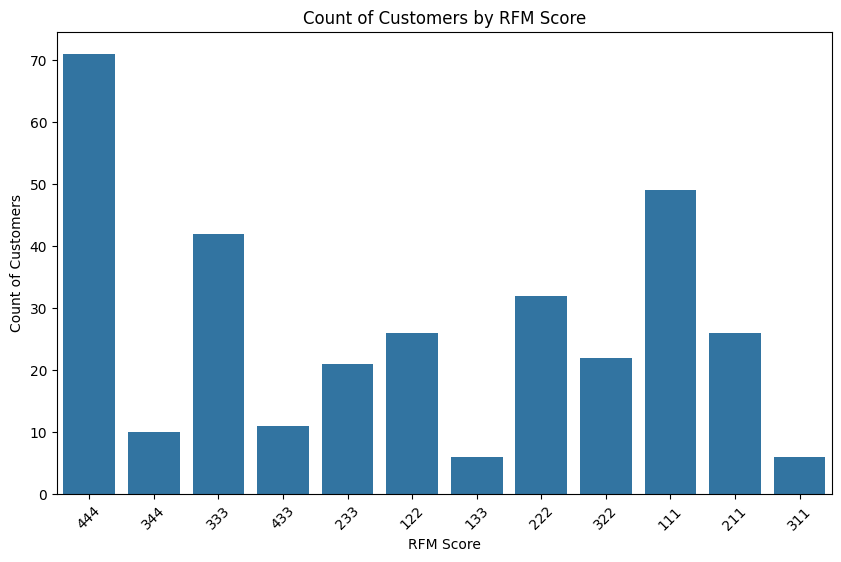

In [109]:
# 5. Visualisasi RFM Score
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_df, x='RFM_Score')
plt.title('Count of Customers by RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()

In [118]:
rfm_df.to_csv('rfm_analysis.csv')

## Conclusion

# Conclution pertanyaan 1

- Analisis menunjukkan bahwa faktor cuaca, seperti suhu, kelembapan, dan kondisi cuaca (weather situation) berpengaruh signifikan terhadap jumlah penyewaan sepeda.
- Ketika suhu lebih tinggi, jumlah penyewaan cenderung meningkat, sedangkan cuaca yang buruk (seperti hujan atau salju) menyebabkan penurunan signifikan dalam jumlah penyewaan.
- Musiman juga berperan, dengan penyewaan yang lebih tinggi selama musim semi dan musim panas dibandingkan dengan musim gugur dan musim dingin. Ini mengindikasikan bahwa pengguna lebih memilih bersepeda dalam kondisi cuaca yang nyaman dan menyenangkan.

# Conclution pertanyaan 2

- Analisis menunjukkan adanya pola yang jelas dalam penyewaan sepeda berdasarkan hari kerja dan hari libur.
- Jumlah penyewaan cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini mungkin disebabkan oleh kebutuhan untuk bertransportasi ke tempat kerja dan sekolah.
- Pada hari libur, meskipun ada beberapa penyewaan, jumlahnya biasanya lebih rendah, mungkin karena pengguna lebih memilih aktivitas lain atau perjalanan yang tidak melibatkan penyewaan sepeda.
- Hari kerja dengan cuaca baik menunjukkan lonjakan yang signifikan dalam penyewaan, sedangkan pada hari libur, cuaca yang baik tidak selalu diterjemahkan menjadi peningkatan penyewaan yang signifikan.